In [22]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import gmaps
import matplotlib.pyplot as plt


# Google API Key
from config import gkey
from config2 import ykey

In [23]:
zipcode_data = pd.read_csv ("./uszips.csv")
zipcode_data.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,951,18.4284,-66.2566,Toa Baja,PR,Puerto Rico,True,NaN,35,32.5,72137,Toa Baja,{'72137':100},False,False,America/Puerto_Rico
1,96863,21.4484,-157.7623,Mcbh Kaneohe Bay,HI,Hawaii,True,NaN,52,708.1,15003,Honolulu,{'15003':100},False,False,Pacific/Honolulu
2,34141,25.9723,-81.0936,Ochopee,FL,Florida,True,NaN,232,0.1,12021,Collier,"{'12021':97.41,'12087':2.59}",False,False,America/New_York
3,78060,28.4469,-98.1071,Oakville,TX,Texas,True,NaN,37,36.3,48297,Live Oak,{'48297':100},False,False,America/Chicago
4,78144,28.9551,-97.8880,Panna Maria,TX,Texas,True,NaN,45,7.7,48255,Karnes,{'48255':100},False,False,America/Chicago


In [24]:
zipcode_gym_data = pd.read_csv ("./zipcode gym count.csv")
zipcode_gym_data.head()

,Unnamed: 0,state_id,zip,lat,lng,gym count
0,7,LA,70801,30.4497,-91.1859,22.0
1,15,NM,88004,32.2231,-106.9874,0.0
2,17,NM,88055,32.7382,-108.7339,0.0
3,20,NM,88262,33.1329,-103.4259,0.0
4,22,SC,29899,33.9279,-82.2507,0.0


In [25]:
county_gym_data = pd.merge (zipcode_gym_data, zipcode_data, on="zip", how="left")
county_gym_data.head()

,Unnamed: 0,state_id_x,zip,lat_x,lng_x,gym count,lat_y,lng_y,city,state_id_y,...,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,7,LA,70801,30.4497,-91.1859,22.0,30.4497,-91.1859,Baton Rouge,LA,...,True,NaN,13,38.7,22033,East Baton Rouge,{'22033':100},False,False,America/Chicago
1,15,NM,88004,32.2231,-106.9874,0.0,32.2231,-106.9874,Las Cruces,NM,...,True,NaN,699,6.9,35013,Doña Ana,{'35013':100},False,False,America/Denver
2,17,NM,88055,32.7382,-108.7339,0.0,32.7382,-108.7339,Redrock,NM,...,True,NaN,37,0.0,35017,Grant,{'35017':100},False,False,America/Denver
3,20,NM,88262,33.1329,-103.4259,0.0,33.1329,-103.4259,Mcdonald,NM,...,True,NaN,30,0.2,35025,Lea,{'35025':100},False,False,America/Denver
4,22,SC,29899,33.9279,-82.2507,0.0,33.9279,-82.2507,Mc Cormick,SC,...,True,NaN,1244,1272.9,45065,McCormick,{'45065':100},False,False,America/New_York


In [74]:
county_gym_data = county_gym_data[["state_id_x", "zip", "gym count", "county_name"]]
county_gym_data.head()


,state_id_x,zip,gym count,county_name
0,LA,70801,22.0,East Baton Rouge
1,NM,88004,0.0,Doña Ana
2,NM,88055,0.0,Grant
3,NM,88262,0.0,Lea
4,SC,29899,0.0,McCormick


In [94]:
county_gym_data_2 = county_gym_data.groupby(["state_id_x","county_name"])

county_gym_data_3 = county_gym_data_2["gym count"].sum()
county_gym_data_3


state_id_x  county_name          
AK          Aleutians East              0.0
            Aleutians West              0.0
            Anchorage                  98.0
            Bethel                      0.0
            Bristol Bay                 0.0
            Denali                      0.0
            Dillingham                  0.0
            Fairbanks North Star        6.0
            Haines                      0.0
            Hoonah-Angoon               0.0
            Juneau                      4.0
            Kenai Peninsula             0.0
            Ketchikan Gateway           0.0
            Kodiak Island               0.0
            Lake and Peninsula          0.0
            Matanuska-Susitna           0.0
            Nome                        0.0
            North Slope                 0.0
            Northwest Arctic            0.0
            Petersburg                  0.0
            Prince of Wales-Hyder       0.0
            Sitka                       0.

In [97]:
county_gym_data_3.to_csv("county gym count.csv")

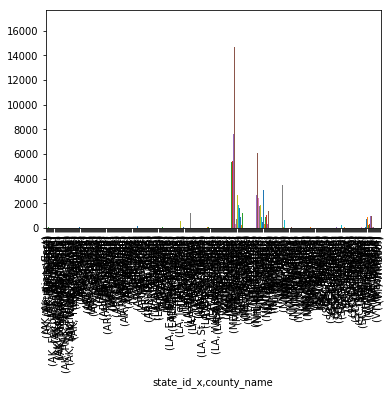

In [95]:
gym_count_chart = county_gym_data_3.plot(kind='bar')

In [73]:
# county_name_list = county_gym_data["county_name"]
# county_name_list = county_name_list.drop_duplicates()
# county_name_list = county_name_list.tolist()
# len(county_name_list)

In [72]:
# gym_count_county = []
# county_in_state =[]
# for county in county_name_list:
#     zipcode_county_data = county_gym_data[(county_gym_data["county_name"]==county)].sum()["gym count"]
#     gym_count_county.append(zipcode_county_data)
#     county_name_state = county_gym_data[(county_gym_data["county_name"]==county)]["state_id_x"]
    
#     county_in_state.append(county_name_state)
    
    
    
# gym_count_county_df = pd.DataFrame({"state": county_in_state, "county_name": county_name_list, "Total Gym Count County": gym_count_county})

# gym_count_county_df.head()


In [ ]:
county_in_state = []



In [ ]:
# gym_count_county_df = pd.DataFrame({"county_name": county_name_list, "Total Gym Count County": gym_count_county})

# gym_count_county_df

In [57]:
# gym_count_county_sate_df = pd.merge (gym_count_county_df, county_gym_data, on= "county_name", how="left")
# gym_count_county_sate_df = gym_count_county_sate_df.drop_duplicates()
# gym_count_county_sate_df